In [1]:
import numpy as np
import os
from intermittent_levy.moments import mom2_serg_log, mom4_serg_log, levy_moments_log
from intermittent_levy.optimization import to_optimize_mom4_and_2_serg_log, to_optimize_levy
from intermittent_levy.classification import form_groups, real_k_and_fisher
from scipy.optimize import minimize


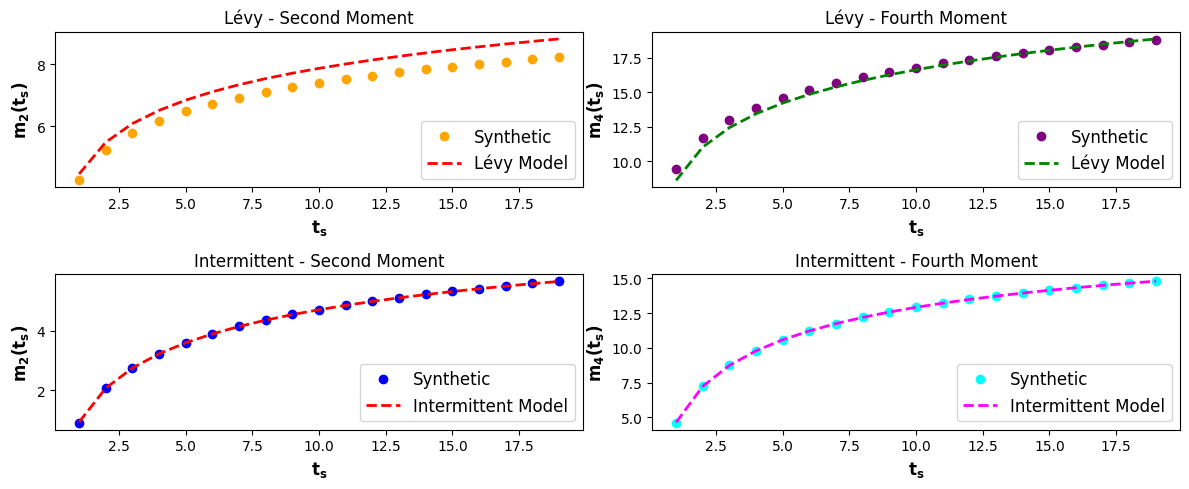

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create results directories if they don't exist
results_dir_levy = 'results/levy'
results_dir_inter = 'results/intermittent'
os.makedirs(results_dir_levy, exist_ok=True)
os.makedirs(results_dir_inter, exist_ok=True)

# Define tau list
tau_list = np.arange(1, 20)

# Load data from files saved in your simulation script
levy_params = np.loadtxt(os.path.join(results_dir_levy, 'lev_generated_params.txt'))
levy_fit_mom2 = np.loadtxt(os.path.join(results_dir_levy, 'lev_generated_lev_fit_list_mom2.txt'))
levy_fit_mom4 = np.loadtxt(os.path.join(results_dir_levy, 'lev_generated_lev_fit_list_mom4.txt'))
levy_logdx2 = np.loadtxt(os.path.join(results_dir_levy, 'lev_generated_logdx2_list.txt'))
levy_logdx4 = np.loadtxt(os.path.join(results_dir_levy, 'lev_generated_logdx4_list.txt'))

inter_params = np.loadtxt(os.path.join(results_dir_inter, 'int_generated_params.txt'))
inter_fit_mom2 = np.loadtxt(os.path.join(results_dir_inter, 'int_generated_int_fit_list_mom2.txt'))
inter_fit_mom4 = np.loadtxt(os.path.join(results_dir_inter, 'int_generated_int_fit_list_mom4.txt'))
inter_logdx2 = np.loadtxt(os.path.join(results_dir_inter, 'int_generated_logdx2_list.txt'))
inter_logdx4 = np.loadtxt(os.path.join(results_dir_inter, 'int_generated_logdx4_list.txt'))

# Calculate average of logs for plotting
avg_levy_log_m2 = np.mean(levy_logdx2, axis=0)
avg_levy_log_m4 = np.mean(levy_logdx4, axis=0)
avg_levy_fit_mom2 = np.mean(levy_fit_mom2, axis=0)
avg_levy_fit_mom4 = np.mean(levy_fit_mom4, axis=0)

avg_inter_log_m2 = np.mean(inter_logdx2, axis=0)
avg_inter_log_m4 = np.mean(inter_logdx4, axis=0)
avg_inter_fit_mom2 = np.mean(inter_fit_mom2, axis=0)
avg_inter_fit_mom4 = np.mean(inter_fit_mom4, axis=0)

# Create the figure with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

# Top left: Lévy - Second Moment
axs[0, 0].plot(tau_list, avg_levy_log_m2, 'o', color='orange', label='Synthetic')
axs[0, 0].plot(tau_list, avg_levy_fit_mom2, '--', linewidth= 2, color='red', label='Lévy Model')
axs[0, 0].set_title('Lévy - Second Moment')
axs[0, 0].set_xlabel(r'$\mathbf{t_s}$', fontsize=12)  # Use \mathbf{} for bold math
axs[0, 0].set_ylabel(r'$\mathbf{m_2(t_s)}$', fontsize=12)
axs[0, 0].legend(fontsize=12)
axs[0, 0].grid(False)

# Top right: Lévy - Fourth Moment
axs[0, 1].plot(tau_list, avg_levy_log_m4, 'o', color='purple', label='Synthetic')
axs[0, 1].plot(tau_list, avg_levy_fit_mom4, '--',  linewidth= 2, color='green', label='Lévy Model')
axs[0, 1].set_title('Lévy - Fourth Moment')
axs[0, 1].set_xlabel(r'$\mathbf{t_s}$', fontsize=12) 
axs[0, 1].set_ylabel(r'$\mathbf{m_4(t_s)}$', fontsize=12)
axs[0, 1].legend(fontsize=12)
axs[0, 1].grid(False)

# Bottom left: Intermittent - Second Moment
axs[1, 0].plot(tau_list, avg_inter_log_m2, 'o', color='blue', label='Synthetic')
axs[1, 0].plot(tau_list, avg_inter_fit_mom2, '--', linewidth= 2, color='red', label='Intermittent Model')
axs[1, 0].set_title('Intermittent - Second Moment')
axs[1, 0].set_xlabel(r'$\mathbf{t_s}$', fontsize=12)  # Use \mathbf{} for bold math
axs[1, 0].set_ylabel(r'$\mathbf{m_2(t_s)}$', fontsize=12)
axs[1, 0].legend(fontsize=12)
axs[1, 0].grid(False)

# Bottom right: Intermittent - Fourth Moment
axs[1, 1].plot(tau_list, avg_inter_log_m4, 'o', color='cyan', label='Synthetic')
axs[1, 1].plot(tau_list, avg_inter_fit_mom4, '--', linewidth= 2, color='magenta', label='Intermittent Model')
axs[1, 1].set_title('Intermittent - Fourth Moment')
axs[1, 1].set_xlabel(r'$\mathbf{t_s}$', fontsize=12)  # Use \mathbf{} for bold math
axs[1, 1].set_ylabel(r'$\mathbf{m_4(t_s)}$', fontsize=12)
axs[1, 1].legend(fontsize=12)
#axs[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('results/levy_intermittent_moments.pdf', dpi=600)
plt.show()

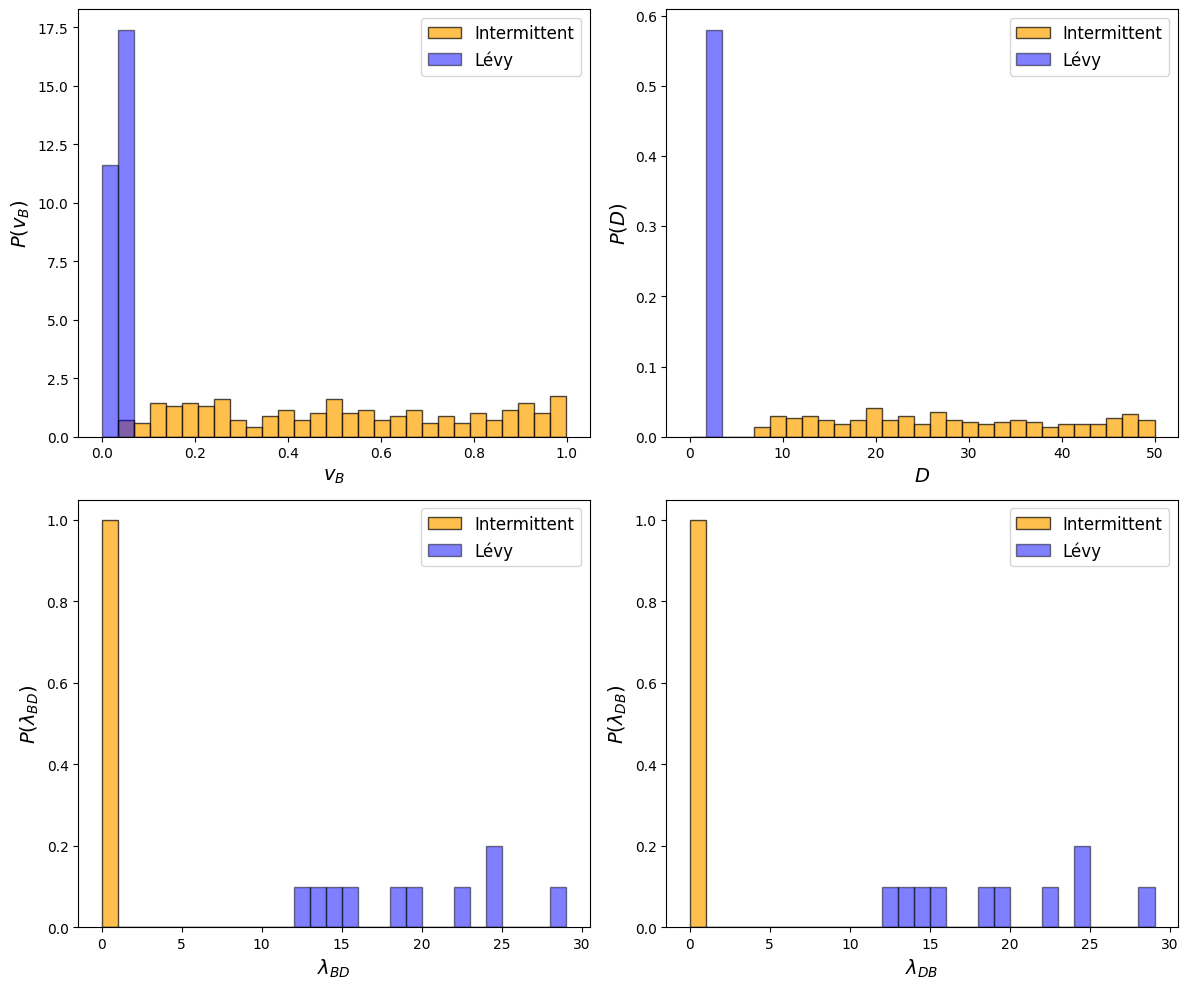

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to your saved parameter files
int_params_file = '/home/shailendra/Documents/PhD_Oslomet/softwareX/Intermittent_and_LevyWalk/intermittent_levy/examples/results/intermittent/int_generated_params.txt'
lev_params_file = '/home/shailendra/Documents/PhD_Oslomet/softwareX/Intermittent_and_LevyWalk/intermittent_levy/examples/results/levy/lev_generated_params.txt'

# Load the parameters
int_params = np.loadtxt(int_params_file)
lev_params = np.loadtxt(lev_params_file)

# Unpack intermittent model parameters
D_int, v_B_int, lambda_BD_int, lambda_DB_int = int_params.T

# Unpack Lévy model parameters
gamma_lev, v_B_lev, tau_0_lev = lev_params.T

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Common plot settings
bins_v_B = np.linspace(0, max(v_B_int.max(), v_B_lev.max()), 30)
bins_D = np.linspace(0, max(D_int.max(), tau_0_lev.max()), 30)
bins_lambda_BD = np.linspace(0, max(lambda_BD_int.max(), gamma_lev.max()), 30)
bins_lambda_DB = np.linspace(0, max(lambda_DB_int.max(), gamma_lev.max()), 30)

# Plot v_B
axes[0, 0].hist(v_B_int, bins=bins_v_B, color='orange', edgecolor='black', label='Intermittent', alpha=0.7, density=True)
axes[0, 0].hist(v_B_lev, bins=bins_v_B, color='blue', edgecolor='black', label='Lévy', alpha=0.5, density=True)
axes[0, 0].set_xlabel(r"$v_B$", fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel(r"$P(v_B)$", fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=12)

# Plot D
axes[0, 1].hist(D_int, bins=bins_D, color='orange', edgecolor='black', label='Intermittent', alpha=0.7, density=True)
axes[0, 1].hist(tau_0_lev, bins=bins_D, color='blue', edgecolor='black', label='Lévy', alpha=0.5, density=True)
axes[0, 1].set_xlabel(r"$D$", fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel(r"$P(D)$", fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=12)

# Plot λ_BD
axes[1, 0].hist(lambda_BD_int, bins=bins_lambda_BD, color='orange', edgecolor='black', label='Intermittent', alpha=0.7, density=True)
axes[1, 0].hist(gamma_lev, bins=bins_lambda_BD, color='blue', edgecolor='black', label='Lévy', alpha=0.5, density=True)
axes[1, 0].set_xlabel(r"$\lambda_{BD}$", fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel(r"$P(\lambda_{BD})$", fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=12)

# Plot λ_DB
axes[1, 1].hist(lambda_DB_int, bins=bins_lambda_DB, color='orange', edgecolor='black', label='Intermittent', alpha=0.7, density=True)
axes[1, 1].hist(gamma_lev, bins=bins_lambda_DB, color='blue', edgecolor='black', label='Lévy', alpha=0.5, density=True)
axes[1, 1].set_xlabel(r"$\lambda_{DB}$", fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel(r"$P(\lambda_{DB})$", fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=12)

# Adjust layout and show
plt.tight_layout()
plt.show()
